<h1 style="color:blue">Homework 1: Hadi Sanaei(K11733444)</h1>

<h3 style="color:red">2.1_Data Cleaning</h3>

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

The first five lines of data

In [83]:
data = pd.read_csv('student-mat.csv')
df = data.copy()
df.head(5)         #Show the first five lines
#df[0:5]           #Show the first five lines
#df.tail(2)        #Show the last two lines


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,2,2,0,...,4,3.0,4,1,1,3,6,5.0,6,6
1,2,GP,F,17,U,GT3,T,1,2,0,...,5,3.0,3,1,1,3,4,5.0,5,6
2,3,GP,F,15,U,LE3,T,1,2,3,...,4,3.0,2,2,3,3,10,7.0,8,10
3,4,GP,F,15,U,GT3,T,1,3,0,...,3,2.0,2,1,1,5,2,15.0,14,15
4,5,GP,F,16,U,GT3,T,1,2,0,...,4,3.0,2,1,2,5,4,6.0,10,10


In [84]:
df.shape          #Show the numbers of rows and columns


(395, 28)

Check missing data

In [85]:
df.isnull().sum()

Unnamed: 0    0
school        0
sex           0
age           0
address       0
famsize       1
Pstatus       0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      1
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            1
G2            0
G3            0
dtype: int64

Total count of missing values

In [86]:
df.isnull().sum().sum()

3

Show rows with missing value

In [87]:
null_data = df[df.isnull().any(axis=1)]
null_data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
165,166,GP,M,16,U,NaN,T,2,1,1,...,4,5.0,2,1,1,2,16,12.0,11,12
249,250,GP,M,16,U,GT3,T,1,1,0,...,4,3.0,2,2,4,5,0,NaN,15,15
343,344,GP,F,17,U,GT3,A,1,2,1,...,3,NaN,1,1,2,4,0,9.0,8,0


Drop the rows where at least one element is missing

In [88]:
#0 = to drop rows ,1 = to drop columns with missing values
#‘any’ : drop if any NaN / missing value is present
#‘all’ : drop if all the values are missing / NaN
df_cleaned=df.dropna(axis=0, how='any' )
df_cleaned

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,2,2,0,...,4,3.0,4,1,1,3,6,5.0,6,6
1,2,GP,F,17,U,GT3,T,1,2,0,...,5,3.0,3,1,1,3,4,5.0,5,6
2,3,GP,F,15,U,LE3,T,1,2,3,...,4,3.0,2,2,3,3,10,7.0,8,10
3,4,GP,F,15,U,GT3,T,1,3,0,...,3,2.0,2,1,1,5,2,15.0,14,15
4,5,GP,F,16,U,GT3,T,1,2,0,...,4,3.0,2,1,2,5,4,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,1,2,2,...,5,5.0,4,4,5,4,11,9.0,9,9
391,392,MS,M,17,U,LE3,T,2,1,0,...,2,4.0,5,3,4,2,3,14.0,16,16
392,393,MS,M,21,R,GT3,T,1,1,3,...,5,5.0,3,3,3,3,3,10.0,8,7
393,394,MS,M,18,R,LE3,T,3,1,0,...,4,4.0,1,3,4,5,0,11.0,12,10


In [89]:
# Print the value counts for categorical columns
for col in df_cleaned.columns:
    #if df_cleaned[col].dtype == 'object':
    print('\nColumn Name:', col)
    print(df_cleaned[col].value_counts())


Column Name: Unnamed: 0
395    1
123    1
125    1
126    1
127    1
      ..
266    1
267    1
268    1
269    1
1      1
Name: Unnamed: 0, Length: 392, dtype: int64

Column Name: school
GP    345
MS     46
Gp      1
Name: school, dtype: int64

Column Name: sex
F    207
M    185
Name: sex, dtype: int64

Column Name: age
16    102
17     97
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Column Name: address
U    304
R     88
Name: address, dtype: int64

Column Name: famsize
GT3    278
LE3    114
Name: famsize, dtype: int64

Column Name: Pstatus
T    352
A     40
Name: Pstatus, dtype: int64

Column Name: traveltime
1    255
2    106
3     23
4      8
Name: traveltime, dtype: int64

Column Name: studytime
2    197
1    103
3     65
4     27
Name: studytime, dtype: int64

Column Name: failures
0    311
1     48
2     17
3     16
Name: failures, dtype: int64

Column Name: schoolsup
no     341
yes     51
Name: schoolsup, dtype: int64

Column Name: fams

Show the index of row

In [90]:
df_cleaned[df_cleaned['school'] == 'Gp'].index

Int64Index([272], dtype='int64')

In [91]:
df_cleaned[df_cleaned['paid'] == 'ye'].index  

Int64Index([384], dtype='int64')

In [92]:
df_cleaned[df_cleaned['G3'] > 20].index

Int64Index([379], dtype='int64')

In [93]:
df_cleaned[df_cleaned['activities'] == 'No'].index

Int64Index([198], dtype='int64')

In [94]:
df_cleaned[df_cleaned['romantic'] == 'YES'].index

Int64Index([342], dtype='int64')

Drop the rows with incorrect typing

In [95]:
df_cleaned = df_cleaned.drop([198,272,342,379,384])

Save the cleaned data as a .csv file

In [96]:
df_cleaned.to_csv(r'New_student.csv', index = False)


<h3 style="color:red">2.2_Exploratory Data Analysis</h3>

Violin plots G1,G2,G3

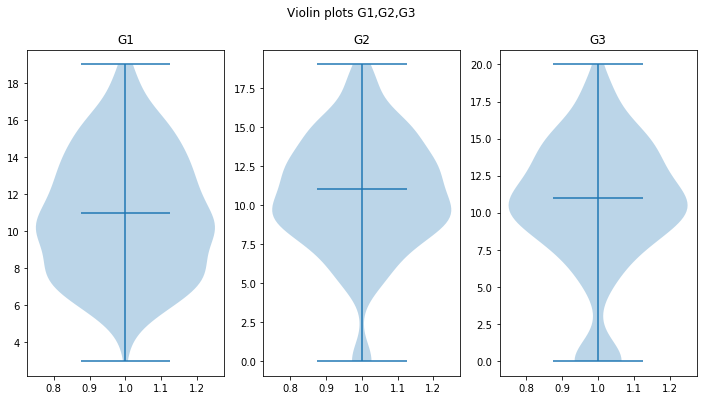

In [98]:
plt.figure(figsize=(12,6))


#violinplot G1
plt.subplot(1, 3,1)
plt.violinplot(df_cleaned['G1'], showmedians=True)
plt.title("G1")

#violinplot G2
plt.subplot(1, 3,2)
plt.violinplot(df_cleaned['G2'], showmedians=True)
plt.title("G2")

#violinplot G3
plt.subplot(1, 3,3)
plt.violinplot(df_cleaned['G3'], showmedians=True)
plt.title("G3")

plt.suptitle("Violin plots G1,G2,G3")
plt.show()

According to the above violin plots, We can see medians are in the middle of each density curve(G1, G2, G3=11) also They show upper and lower values for each density curve. There is one important point where show us the width of each curve corresponds with the approximate frequency of values. So we can say the grade of students in G2 is a little better than G1 but in the final grade, the median of G3 is equal to G1, G2. 

In [99]:
#df_cleaned.boxplot(column=['G1', 'G2', 'G3'])

 Value Counts for Categorical Columns


In [100]:
# Print the value counts for categorical columns
for col in df.columns:
    print('\nColumn Name:', col,)
    print(df[col].value_counts())


Column Name: Unnamed: 0
395    1
124    1
126    1
127    1
128    1
      ..
266    1
267    1
268    1
269    1
1      1
Name: Unnamed: 0, Length: 395, dtype: int64

Column Name: school
GP    348
MS     46
Gp      1
Name: school, dtype: int64

Column Name: sex
F    208
M    187
Name: sex, dtype: int64

Column Name: age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Column Name: address
U    307
R     88
Name: address, dtype: int64

Column Name: famsize
GT3    280
LE3    114
Name: famsize, dtype: int64

Column Name: Pstatus
T    354
A     41
Name: Pstatus, dtype: int64

Column Name: traveltime
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

Column Name: studytime
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

Column Name: failures
0    312
1     50
2     17
3     16
Name: failures, dtype: int64

Column Name: schoolsup
no     344
yes     51
Name: schoolsup, dtype: int64

Column Name: fams

Show the unique value

In [101]:
unique_Addr = df_cleaned['address'].unique()
unique_Ttime = df_cleaned['traveltime'].unique()
unique_G3 = df_cleaned['G3'].unique()
#unique_Addr
#unique_Ttime
#unique_G3


Number of unique value

In [102]:
n_unique_Addr = df_cleaned['address'].nunique()
n_unique_Ttime = df_cleaned['traveltime'].nunique()
n_unique_G3 = df_cleaned['G3'].nunique()
#n_unique_Addr
#n_unique_Ttime
#n_unique_G3

In [103]:
dups_Addr = df_cleaned.pivot_table(index=['address'], aggfunc='size')
dups_Ttime = df_cleaned.pivot_table(index=['traveltime'], aggfunc='size')
dups_G3 = df_cleaned.pivot_table(index='G3', aggfunc='size')
#dups_Addr
#dups_Ttime
#dups_G3

Traveltime Barchart

Text(0.5, 0, 'Students')

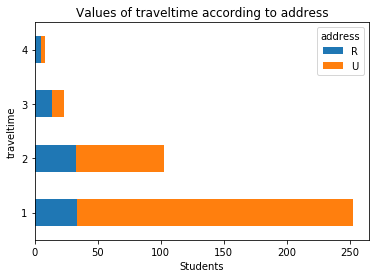

In [104]:
df_cleaned.pivot_table(index='traveltime', columns='address', aggfunc='size').plot.barh(stacked=True)
plt.title("Values of traveltime according to address")
plt.xlabel("Students")


G3 Barchart

Text(0.5, 0, 'Students')

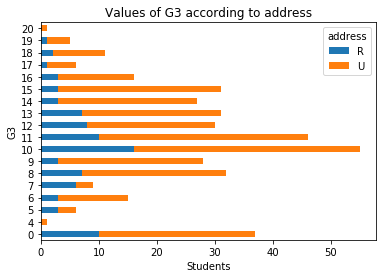

In [105]:
df_cleaned.pivot_table(index='G3', columns='address', aggfunc='size').plot.barh(stacked=True)
plt.title("Values of G3 according to address")
plt.xlabel("Students")


Traveltime Barchart shows that the most of student lives in urban and between them, most of them need to 1 hour travel time from home to school. On the other side in G3 Barchat because the number of students R and U is not equal we can not say which one got a better grade but obviously, most of the final grades are more than 8. 

In [106]:
df_cleaned['Gmean'] = round(df[['G1','G2' ,'G3']].mean(axis=1),2)
df_cleaned

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gmean
0,1,GP,F,18,U,GT3,A,2,2,0,...,3.0,4,1,1,3,6,5.0,6,6,5.67
1,2,GP,F,17,U,GT3,T,1,2,0,...,3.0,3,1,1,3,4,5.0,5,6,5.33
2,3,GP,F,15,U,LE3,T,1,2,3,...,3.0,2,2,3,3,10,7.0,8,10,8.33
3,4,GP,F,15,U,GT3,T,1,3,0,...,2.0,2,1,1,5,2,15.0,14,15,14.67
4,5,GP,F,16,U,GT3,T,1,2,0,...,3.0,2,1,2,5,4,6.0,10,10,8.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,1,2,2,...,5.0,4,4,5,4,11,9.0,9,9,9.00
391,392,MS,M,17,U,LE3,T,2,1,0,...,4.0,5,3,4,2,3,14.0,16,16,15.33
392,393,MS,M,21,R,GT3,T,1,1,3,...,5.0,3,3,3,3,3,10.0,8,7,8.33
393,394,MS,M,18,R,LE3,T,3,1,0,...,4.0,1,3,4,5,0,11.0,12,10,11.00


In [107]:
#round(df_cleaned[["school","Gmean"]].groupby("school").mean(),2)

In [108]:
#data_wide = df_cleaned.pivot(columns='school',values='Gmean')
#data_wide

<ipython-input-109-bdea97e234fe>:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  sns.kdeplot(df_cleaned.ix[df_cleaned['school'] == 'GP', 'Gmean'], label = 'GP', shade = True)
<ipython-input-109-bdea97e234fe>:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  sns.kdeplot(df_cleaned.ix[df_cleaned['school'] == 'MS', 'Gmean'], label = 'MS', shade = True)


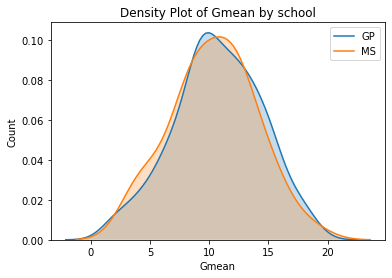

In [109]:
# Grade distribution by school
sns.kdeplot(df_cleaned.ix[df_cleaned['school'] == 'GP', 'Gmean'], label = 'GP', shade = True)
sns.kdeplot(df_cleaned.ix[df_cleaned['school'] == 'MS', 'Gmean'], label = 'MS', shade = True)
plt.xlabel('Gmean'); plt.ylabel('Count'); plt.title('Density Plot of Gmean by school');


According to the above Density plot, we can say both schools are the same in teaching and final grade of students.

Scatter plot of ’G1’ and ’G2’

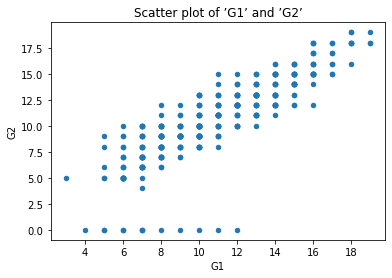

In [110]:
df_cleaned.plot(kind='scatter',x='G1',y='G2')
plt.title('Scatter plot of ’G1’ and ’G2’');
plt.show()

Scatter plot of ’G1’ and ’G3’

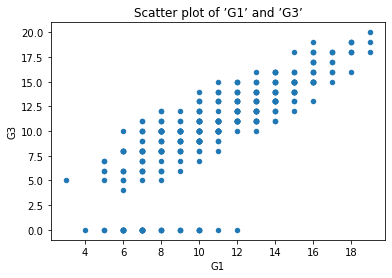

In [111]:
df_cleaned.plot(kind='scatter',x='G1',y='G3')
plt.title('Scatter plot of ’G1’ and ’G3’');
plt.show()

Scatter plot of ’G2’ and ’G3’

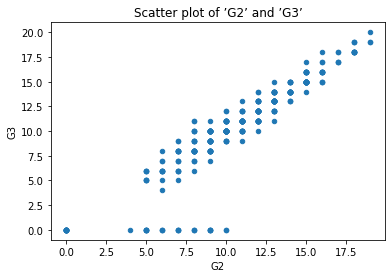

In [112]:
df_cleaned.plot(kind='scatter',x='G2',y='G3')
plt.title('Scatter plot of ’G2’ and ’G3’');
plt.show()

From the obtained results and the above plots, it can be concluded that in the above G1&G2 and G1&G3, the distribution of data is higher but in the plot of G2&G3, we have overlapped. 

<h3 style="color:red">2.3_More Analysis</h3>

In [113]:
df_cleaned['G3'].value_counts()

10    55
11    46
0     37
8     32
15    31
13    31
12    30
9     28
14    27
16    16
6     15
18    11
7      9
17     6
5      6
19     5
4      1
20     1
Name: G3, dtype: int64

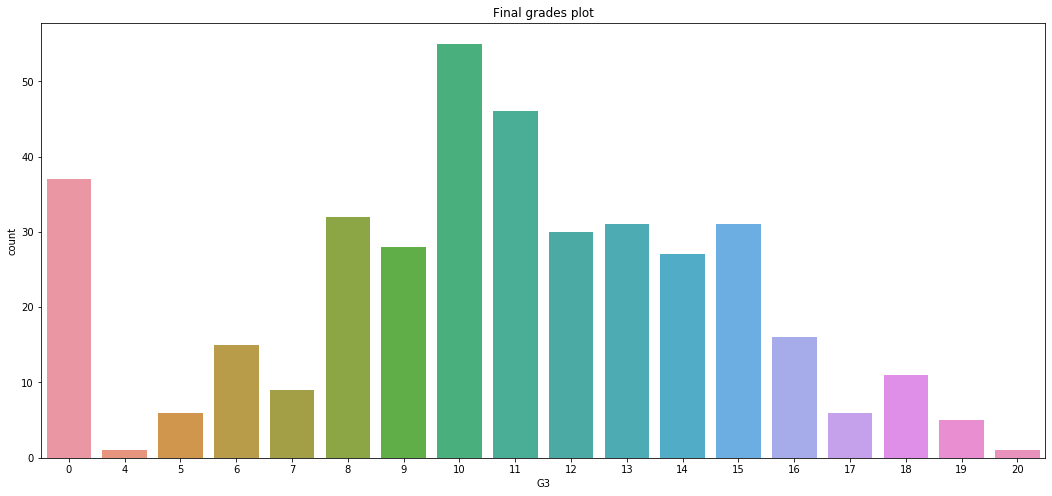

In [114]:
plt.figure(figsize=(18,8))
plt.title('Final grades plot');
sns.countplot(x=df_cleaned['G3'])

Does traveltime impacts the grades?

In [115]:
print(pd.crosstab(df_cleaned.traveltime, df_cleaned.G3))

G3          0   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
traveltime                                                                   
1           20   1   6   8   5  19  20  28  34  20  19  22  21  12   4   9   
2           12   0   0   6   3  10   7  19   9   8   8   5   8   4   2   1   
3            4   0   0   1   0   3   0   5   2   2   3   0   2   0   0   1   
4            1   0   0   0   1   0   1   3   1   0   1   0   0   0   0   0   

G3          19  20  
traveltime          
1            4   1  
2            1   0  
3            0   0  
4            0   0  


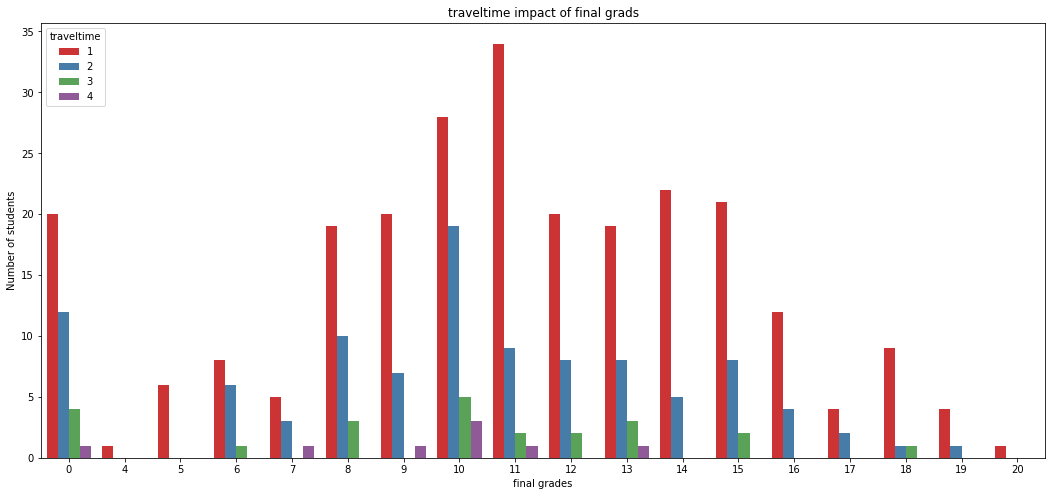

In [116]:
plt.figure(figsize=(18,8))
axn_status = sns.countplot(df_cleaned['G3'], hue='traveltime', data=df, palette='Set1')
axn_status.set(title="traveltime impact of final grads", xlabel="final grades", ylabel="Number of students")
plt.show()

Does higher education impacts the grades?

In [117]:
print(pd.crosstab(df_cleaned.higher, df_cleaned.G3))

G3      0   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20
higher                                                                        
no       6   0   0   0   1   4   2   3   0   2   1   0   0   0   0   0   0   0
yes     31   1   6  15   8  28  26  52  46  28  30  27  31  16   6  11   5   1


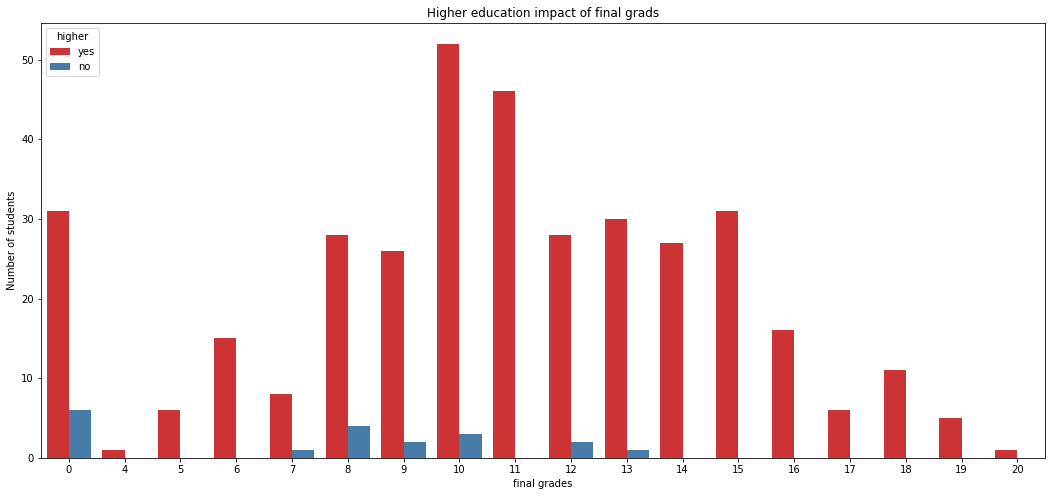

In [118]:
plt.figure(figsize=(18,8))
axn_status = sns.countplot(df_cleaned['G3'], hue='higher', data=df, palette='Set1')
axn_status.set(title="Higher education impact of final grads", xlabel="final grades", ylabel="Number of students")
plt.show()

Does internet usage impacts the grades?

In [119]:
print(pd.crosstab(df_cleaned.internet, df_cleaned.G3))

G3        0   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  \
internet                                                                       
no         8   0   0   5   3   3   6  12   5   7   4   5   2   0   1   2   0   
yes       29   1   6  10   6  29  22  43  41  23  27  22  29  16   5   9   5   

G3        20  
internet      
no         0  
yes        1  


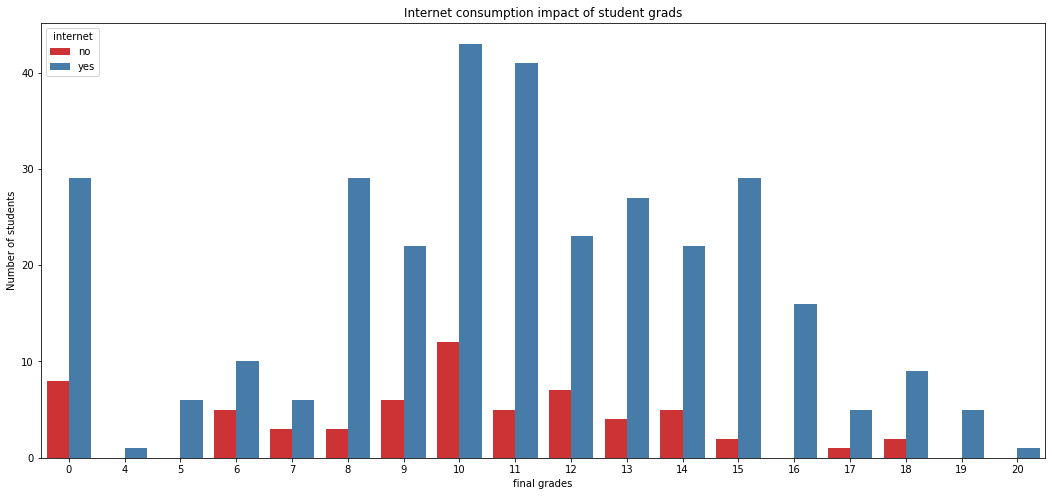

In [120]:
plt.figure(figsize=(18,8))
axn_status = sns.countplot(df_cleaned['G3'], hue='internet', data=df, palette='Set1')
axn_status.set(title="Internet consumption impact of student grads", xlabel="final grades", ylabel="Number of students")
plt.show()

# Conclusions

In conclusion, I consider three items important and effective on the final grade of students. (travel time, Higher education, Internet usage). I showed them on the bar chart. According to the charts, I can say the fewer time students spend from home to school then they will be better the final grades. As well as the role of higher education and the use of the internet and access to it for more learning is so impacting the final grade of students. Usually use the internet with more learning leads to better results. 